In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
cd /content/drive/My Drive/5. Fundamentals of machine learning

/content/drive/My Drive/5. Fundamentals of machine learning


In [4]:
pwd

'/content/drive/My Drive/5. Fundamentals of machine learning'

## 5.1 Generalization: the goal of machine learning

### 5.1.1 Underfitting and overfitting

Listing 5.1 Adding white-noise channels or all-zeros channels to MNIST

In [ ]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
(train_data, train_labels), _ = keras.datasets.mnist.load_data()
#proprocess and normalize mnist data
train_data = train_data.astype(np.float32).reshape(train_data.shape[0], -1) / 255.

train_images_with_noise_channels = np.concatenate([train_data, np.random.random((train_data.shape[0], train_data.shape[1]))], axis=1)
train_images_with_zero_channels = np.concatenate([train_data, np.zeros((train_data.shape[0], train_data.shape[1]))], axis=1)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print("New dimension of the train dataset after having added zero/noise channels: ",train_images_with_zero_channels.shape)

New dimension of the train dataset after having added zero/noise channels:  (60000, 1568)


#### Listing 5.2 Training the same model on MNIST data with noise channels or all-zero channels

In [ ]:
def get_model():
  model = models.Sequential([
                             layers.Dense(units=512, activation="relu"),
                             layers.Dense(units=10, activation="softmax")
  ])
  model.compile(
      optimizer=optimizers.RMSprop(),
      loss=losses.SparseCategoricalCrossentropy(),
      metrics=metrics.SparseCategoricalAccuracy()
  )
  return model
model = get_model()
history_noise = model.fit(
    x=train_images_with_noise_channels,
    y=train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)
model = get_model()
history_zeros = model.fit(
    x=train_images_with_zero_channels,
    y=train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 8s 18ms/step - loss: 0.6136 - sparse_categorical_accuracy: 0.8162 - val_loss: 0.2983 - val_sparse_categorical_accuracy: 0.9027
Epoch 2/10
375/375 [==============================] - 7s 18ms/step - loss: 0.2468 - sparse_categorical_accuracy: 0.9229 - val_loss: 0.1757 - val_sparse_categorical_accuracy: 0.9471
Epoch 3/10
375/375 [==============================] - 7s 18ms/step - loss: 0.1584 - sparse_categorical_accuracy: 0.9507 - val_loss: 0.2215 - val_sparse_categorical_accuracy: 0.9356
Epoch 4/10
375/375 [==============================] - 7s 19ms/step - loss: 0.1134 - sparse_categorical_accuracy: 0.9648 - val_loss: 0.1438 - val_sparse_categorical_accuracy: 0.9578
Epoch 5/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0803 - sparse_categorical_accuracy: 0.9754 - val_loss: 0.1446 - val_sparse_categorical_accuracy: 0.9567
Epoch 6/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0575 - sparse_cate

In [ ]:
history_zeros.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

#### Listing 5.3 Plotting a validation accuracy comparison

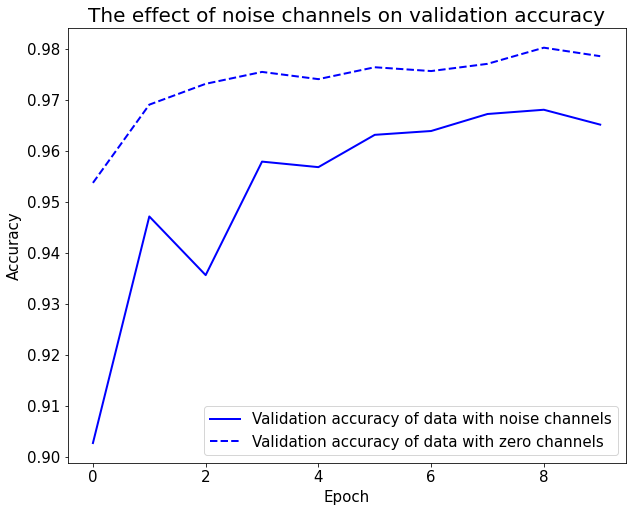

In [ ]:
val_acc_noise = history_noise.history["val_sparse_categorical_accuracy"]
val_acc_zeros = history_zeros.history["val_sparse_categorical_accuracy"]
plt.figure(figsize=(10, 8))
plt.plot(val_acc_noise, linestyle="-", color="blue", linewidth=2)
plt.plot(val_acc_zeros, linestyle="--", color="blue", linewidth=2)
plt.xlabel("Epoch", fontsize=15, labelpad=5)
plt.ylabel("Accuracy", fontsize=15, labelpad=5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("The effect of noise channels on validation accuracy", fontsize=20)
plt.legend(["Validation accuracy of data with noise channels", "Validation accuracy of data with zero channels"], fontsize=15)

The accuracy of the dataset with added noise is around 1% lower than that with added zeros. It is concluded that the more noise, the more degraded accuracy.

Implement mutual information

In [ ]:
from sklearn.feature_selection import mutual_info_classif

## 5.2 Evaluating machine-learning models

### 5.2.1 Training, validation, and test sets

#### SIMPLE HOLD-OUT VALIDATION

In [ ]:
import numpy as np
from  tensorflow import keras
from tensorflow.keras import models, layers, optimizers, losses, metrics
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = np.random.randn(50000, 10000)
num_validation_samples = 10000
np.random.shuffle(data)
validation_data = data[:num_validation_samples]
training_data = data[num_validation_samples:]
model = get_model()
model.fit(training_data)
model = get_model()
model.fit(np.concatenate([training_data, validation_data])) # at this point, it is common to retrain the model from scratch using all non-test data,  after having tuned the hyperparameters of the model through tuning the model, retrain it, evaluate and tune again, 
validation_score = model.evaluate(validation_data,)
test_score = model.evaluate(test_data)

#### K-FOLD VALIDATION

In [ ]:
train_data[:0]

array([], shape=(0, 784), dtype=float32)

In [ ]:
k = 3
num_validation_samples = data.shape[0] // k
np.random.shuffle(data)
validation_scores = []
for i in range(k):
  validation_data = data[i * num_validation_samples : (i+1) * num_validation_samples, :]
  training_data = np.concatenate([data[:num_validation_samples * i], data[num_validation * (i + 1):]])
  model = get_model()
  model.fit(training_data)
  validation_scores.append(model.evaluate(validation_data, validation_targets))
validation_score = np.mean(validation_scores)
model = get_model()
model.fit(data, )
test_score = model.evaluate(test_data, )

## 5.3 Improving model fit

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers, losses, metrics, datasets

### 5.3.1 Tuning key gradient descent parameters

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images = train_images.reshape(train_images.shape[0], -1).astype("float32") / 255.
test_images = test_images.reshape(test_images.shape[0], -1).astype("float32") / 255.

#### Listing 5.7 Training a MNIST model with an incorrectly high learning rate

In [ ]:
model = models.Sequential([
                           layers.Dense(512, activation="relu"),
                           layers.Dense(10, activation="softmax")
])
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=1.),
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=metrics.SparseCategoricalAccuracy()
)
model.fit(
    x=train_images,
    y=train_labels,
    batch_size=128,
    validation_split=0.2,
    epochs=10
)

Epoch 1/10
375/375 [==============================] - 4s 10ms/step - loss: 1226.6351 - sparse_categorical_accuracy: 0.3730 - val_loss: 3.1285 - val_sparse_categorical_accuracy: 0.2089
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 5.3513 - sparse_categorical_accuracy: 0.2346 - val_loss: 2.1038 - val_sparse_categorical_accuracy: 0.1960
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 3.4547 - sparse_categorical_accuracy: 0.2548 - val_loss: 2.1458 - val_sparse_categorical_accuracy: 0.2131
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 2.7107 - sparse_categorical_accuracy: 0.2404 - val_loss: 2.1213 - val_sparse_categorical_accuracy: 0.2563
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 2.6890 - sparse_categorical_accuracy: 0.2294 - val_loss: 2.2854 - val_sparse_categorical_accuracy: 0.2419
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 2.6104 - sparse_c

#### Listing 5.8 The same model with a more appropriate learning rate

In [ ]:
model = models.Sequential([
                           layers.Dense(units=512, activation="relu"),
                           layers.Dense(units=10, activation="softmax")
])
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=1e-2),
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=metrics.SparseCategoricalAccuracy()
)
model.fit(
    x=train_images,
    y=train_labels,
    batch_size=128,
    validation_split=0.2,
    epochs=10
)

Epoch 1/10
375/375 [==============================] - 4s 10ms/step - loss: 0.3648 - sparse_categorical_accuracy: 0.9105 - val_loss: 0.1772 - val_sparse_categorical_accuracy: 0.9498
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1413 - sparse_categorical_accuracy: 0.9639 - val_loss: 0.1788 - val_sparse_categorical_accuracy: 0.9586
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1149 - sparse_categorical_accuracy: 0.9723 - val_loss: 0.1814 - val_sparse_categorical_accuracy: 0.9670
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1003 - sparse_categorical_accuracy: 0.9779 - val_loss: 0.1781 - val_sparse_categorical_accuracy: 0.9716
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0859 - sparse_categorical_accuracy: 0.9823 - val_loss: 0.2307 - val_sparse_categorical_accuracy: 0.9661
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0705 - sparse_cate

## 5.4 Improving generalization

In [5]:
from tensorflow import keras
from tensorflow.keras import datasets, models, layers, optimizers, losses, metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### 5.4.4 Regularizing your model

#### Listing 5.10 Original model

In [6]:
(train_data, train_labels), (test_data, test_labels) = datasets.imdb.load_data(num_words=10000)
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i in range(len(sequences)):
    results[i, sequences[i]] = 1
  return results
train_data = vectorize_sequences(train_data)
test_data = vectorize_sequences(test_data)
model = models.Sequential([
                           layers.Dense(units=16, activation="relu"),
                           layers.Dense(units=16, activation="relu"),
                           layers.Dense(units=1, activation="sigmoid")
])
model.compile(
    optimizer=optimizers.RMSprop(),
    loss=losses.BinaryCrossentropy(),
    metrics=metrics.BinaryAccuracy()
)
history_original = model.fit(
    x=train_data,
    y=train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4
)

17473536/17464789 [==============================] - 1s 0us/step
Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.5199 - binary_accuracy: 0.7748 - val_loss: 0.3806 - val_binary_accuracy: 0.8774
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3069 - binary_accuracy: 0.9017 - val_loss: 0.3051 - val_binary_accuracy: 0.8846
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2222 - binary_accuracy: 0.9278 - val_loss: 0.2820 - val_binary_accuracy: 0.8876
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1771 - binary_accuracy: 0.9417 - val_loss: 0.2775 - val_binary_accuracy: 0.8905
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1439 - binary_accuracy: 0.9532 - val_loss: 0.3067 - val_binary_accuracy: 0.8784
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1159 - binary_accuracy: 0.9656 - val_loss: 0.2927 - val_binary_accuracy: 0.8865
Epoch

#### Listing 5.11 Version of the model with lower capacity

In [7]:
model = models.Sequential([
                           layers.Dense(units=4, activation="relu"),
                           layers.Dense(units=4, activation="relu"),
                           layers.Dense(units=1, activation="sigmoid")
])
model.compile(
    optimizer=optimizers.RMSprop(),
    loss=losses.BinaryCrossentropy(),
    metrics=metrics.BinaryAccuracy()
)
history_smaller = model.fit(
    x=train_data,
    y=train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4
)

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.6177 - binary_accuracy: 0.6392 - val_loss: 0.5659 - val_binary_accuracy: 0.6999
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.5234 - binary_accuracy: 0.7863 - val_loss: 0.5225 - val_binary_accuracy: 0.7923
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.4784 - binary_accuracy: 0.8526 - val_loss: 0.4985 - val_binary_accuracy: 0.8569
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.4463 - binary_accuracy: 0.8870 - val_loss: 0.4834 - val_binary_accuracy: 0.8459
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.4211 - binary_accuracy: 0.9073 - val_loss: 0.4699 - val_binary_accuracy: 0.8671
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.4004 - binary_accuracy: 0.9229 - val_loss: 0.4634 - val_binary_accuracy: 0.8668
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - los

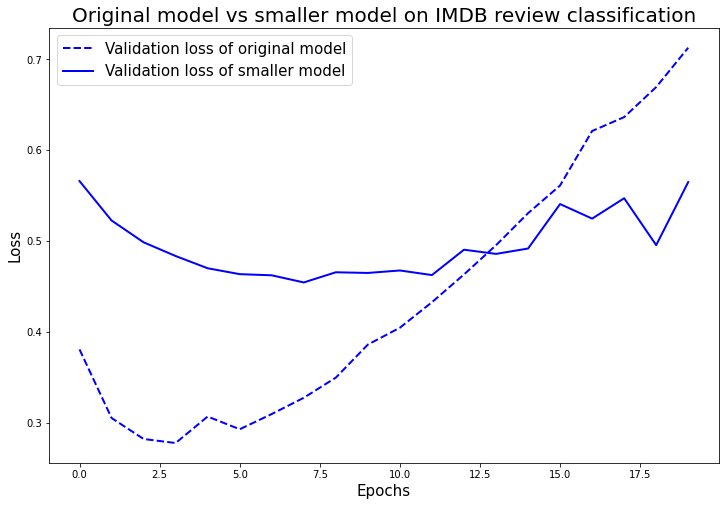

In [8]:
orig_val_loss = history_original.history["val_loss"]
small_val_loss = history_smaller.history["val_loss"]
plt.plot(orig_val_loss, 'b--',  small_val_loss, 'b-',  linewidth=2)
plt.legend(labels=["Validation loss of original model", "Validation loss of smaller model"], fontsize=15)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.title("Original model vs smaller model on IMDB review classification", fontsize=20)
plt.gcf().set_size_inches(12, 8)

In [9]:
model = keras.Sequential([
layers.Dense(512, activation="relu"),
layers.Dense(512, activation="relu"),
layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
loss="binary_crossentropy",
metrics=["accuracy"])
history_larger_model = model.fit(
train_data, train_labels,
epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 7s 214ms/step - loss: 0.5296 - accuracy: 0.7567 - val_loss: 0.3894 - val_accuracy: 0.8378
Epoch 2/20
30/30 [==============================] - 6s 204ms/step - loss: 0.2564 - accuracy: 0.9001 - val_loss: 0.3158 - val_accuracy: 0.8733
Epoch 3/20
30/30 [==============================] - 6s 203ms/step - loss: 0.1594 - accuracy: 0.9389 - val_loss: 0.3107 - val_accuracy: 0.8867
Epoch 4/20
30/30 [==============================] - 6s 202ms/step - loss: 0.1046 - accuracy: 0.9684 - val_loss: 0.3475 - val_accuracy: 0.8874
Epoch 5/20
30/30 [==============================] - 6s 202ms/step - loss: 0.0932 - accuracy: 0.9758 - val_loss: 0.3430 - val_accuracy: 0.8810
Epoch 6/20
30/30 [==============================] - 6s 202ms/step - loss: 0.0076 - accuracy: 0.9995 - val_loss: 0.5054 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 6s 200ms/step - loss: 0.0010 - accuracy: 0.9999 - val_loss: 0.6069 - val_accuracy: 0.8846
Epoch 

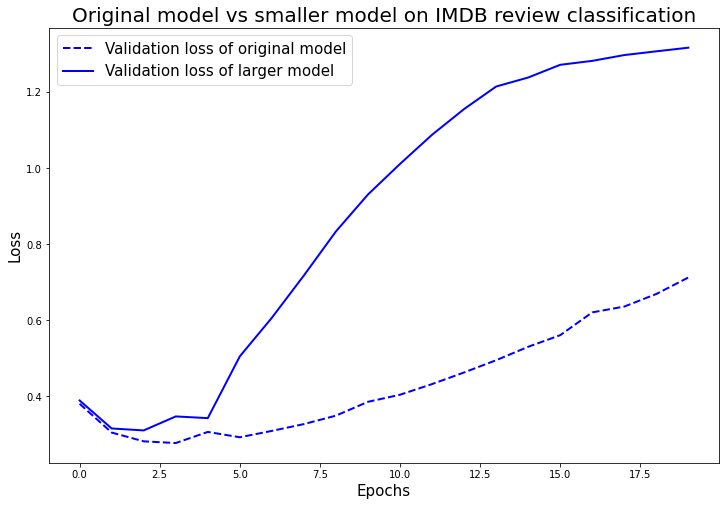

In [10]:
orig_val_loss = history_original.history["val_loss"]
small_val_loss = history_larger_model.history["val_loss"]
plt.plot(orig_val_loss, 'b--',  small_val_loss, 'b-',  linewidth=2)
plt.legend(labels=["Validation loss of original model", "Validation loss of larger model"], fontsize=15)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.title("Original model vs smaller model on IMDB review classification", fontsize=20)
plt.gcf().set_size_inches(12, 8)

#### ADDING WEIGHT REGULARIZATION

In [11]:
from tensorflow.keras import regularizers

#### Listing 5.13 Adding L2 weight regularization to the model

In [12]:
model = models.Sequential([
                           layers.Dense(units=16,
                                        kernel_regularizer=regularizers.l2(2e-3),
                                        activation="relu"),
                           layers.Dense(units=16,
                                        kernel_regularizer=regularizers.l2(2e-3)),
                           layers.Dense(units=1, activation="sigmoid")
]
)
model.compile(
    optimizer="RMSprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
history_l2_reg = model.fit(
    x=train_data,
    y=train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4
)

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5606 - accuracy: 0.7969 - val_loss: 0.4317 - val_accuracy: 0.8756
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3692 - accuracy: 0.9018 - val_loss: 0.3992 - val_accuracy: 0.8736
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3165 - accuracy: 0.9160 - val_loss: 0.3872 - val_accuracy: 0.8749
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2887 - accuracy: 0.9272 - val_loss: 0.3605 - val_accuracy: 0.8896
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2690 - accuracy: 0.9357 - val_loss: 0.3681 - val_accuracy: 0.8853
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2577 - accuracy: 0.9373 - val_loss: 0.3733 - val_accuracy: 0.8846
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2468 - accuracy: 0.9425 - val_loss: 0.3793 - val_accuracy: 0.8819
Epoch 8/20
30

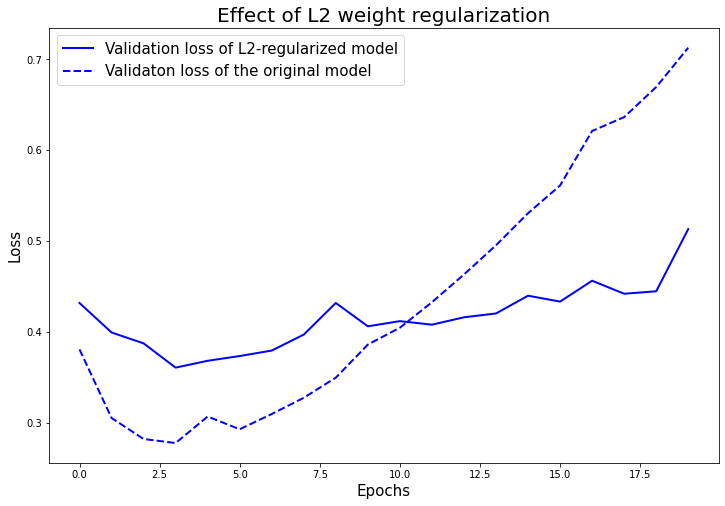

In [21]:
l2_val_loss = history_l2_reg.history["val_loss"]
plt.figure(figsize=(12, 8))
plt.plot(l2_val_loss, 'b-', orig_val_loss, 'b--', linewidth=2)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.title("Effect of L2 weight regularization", fontsize=20)
plt.legend(["Validation loss of L2-regularized model", "Validaton loss of the original model"], fontsize=15)

L2-regularized model is more resistant to overfitting than the original model regardless of them both having the same number of parameters for learning.

#### Listing 5.14 Different weight regularizers available in Keras

In [22]:
from keras import regularizers
regularizers.l1(l1=0.1)
regularizers.l1_l2(l1=0.1, l2=0.5)

#### Listing 5.15 Adding dropout to the IMDB model

In [24]:
model = models.Sequential([
                           layers.Dense(units=16, activation="relu"),
                           layers.Dropout(0.5),
                           layers.Dense(units=16, activation="relu"),
                           layers.Dropout(0.5),
                           layers.Dense(units=1, activation="sigmoid")
])
model.compile(
    optimizer=optimizers.RMSprop(),
    loss=losses.BinaryCrossentropy(),
    metrics=metrics.BinaryAccuracy()
)
history_dropout = model.fit(
    x=train_data,
    y=train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4
)

Epoch 1/20
30/30 [==============================] - 3s 74ms/step - loss: 0.6495 - binary_accuracy: 0.6108 - val_loss: 0.5687 - val_binary_accuracy: 0.8271
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.5427 - binary_accuracy: 0.7489 - val_loss: 0.4410 - val_binary_accuracy: 0.8683
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.4544 - binary_accuracy: 0.8053 - val_loss: 0.3660 - val_binary_accuracy: 0.8812
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3885 - binary_accuracy: 0.8475 - val_loss: 0.3105 - val_binary_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3330 - binary_accuracy: 0.8787 - val_loss: 0.2846 - val_binary_accuracy: 0.8916
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2878 - binary_accuracy: 0.9001 - val_loss: 0.2768 - val_binary_accuracy: 0.8895
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - los

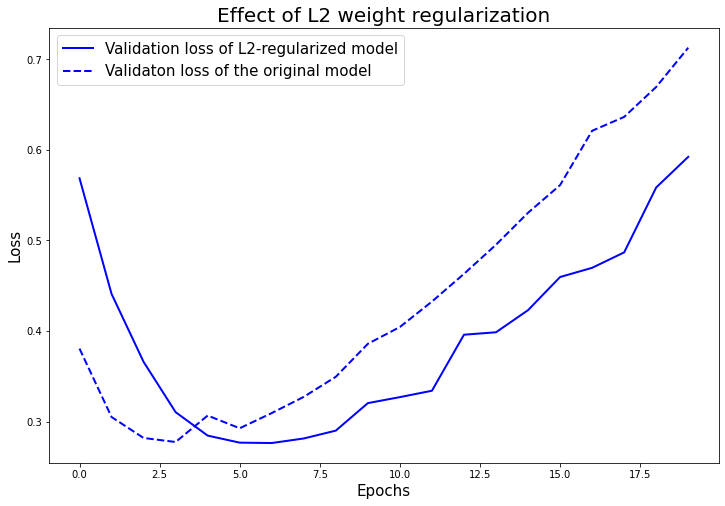

In [27]:
dropout_val_loss = history_dropout.history["val_loss"]
plt.figure(figsize=(12, 8))
plt.plot(dropout_val_loss, 'b-', orig_val_loss, 'b--', linewidth=2)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.title("Effect of L2 weight regularization", fontsize=20)
plt.legend(["Validation loss of L2-regularized model", "Validaton loss of the original model"], fontsize=15)

This seems to work better than the model with L2-regularization and the orginal model due to the lowest validation loss achieved so far.